<a href="https://colab.research.google.com/github/joaorosa2/analise_combustiveis_brasil/blob/main/ProjetoM4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

tabelaAgosto  = pd.read_csv('https://raw.githubusercontent.com/joaorosa2/analise_combustiveis_brasil/main/precos-gasolina-etanol-Agosto.csv',sep= ';',engine= 'python')
tabelaJulho = pd.read_csv('https://raw.githubusercontent.com/joaorosa2/analise_combustiveis_brasil/main/precos-gasolina-etanol-Julho.csv',sep= ';',engine= 'python')

#<font color = orange>Limpeza e adaptação dos dados:

Mudando o tipo da coluna "Valor de venda" para float.
1. Função lambda para trocar Virgula por ponto com o "replace";
2. "astype" para mudar de string para float.



In [ ]:
colocaPonto = lambda x: x.replace(',','.')

tabelaJulho['Valor de Venda'] =(tabelaJulho['Valor de Venda'].apply(colocaPonto)).astype(str).astype(float)
tabelaAgosto['Valor de Venda'] = (tabelaAgosto['Valor de Venda'].apply(colocaPonto)).astype(str).astype(float)

### <font color= orange> Retirando as colunas **Nome da Rua**, **Numero Rua** e **Complemento** para limpar os dados da **tabelaJulho** e **tabelaAgosto** do nosso dataframe

- retirando a coluna **Nome da Rua** do dataframe **tabelaJulho**

In [ ]:
tabelaJulho = tabelaJulho.drop('Nome da Rua', axis=1)
tabelaJulho.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,35,NaN,LACE,29703-030,GASOLINA ADITIVADA,01/07/2022,7.48,NaN,R$ / litro,VIBRA ENERGIA
1,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,35,NaN,LACE,29703-030,GASOLINA,01/07/2022,7.38,NaN,R$ / litro,VIBRA ENERGIA
2,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,52,LETRA A,LACE,29703-055,ETANOL,01/07/2022,5.99,NaN,R$ / litro,VIBRA ENERGIA
3,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,52,LETRA A,LACE,29703-055,GASOLINA,01/07/2022,7.39,NaN,R$ / litro,VIBRA ENERGIA
4,CO,GO,GOIANIA,JUSTINIANO & JUSTINIANO LTDA,04.489.287/0001-16,"2,36","QUADRA 18, LOTE 01",PARQUE AMAZONIA,74840-390,GASOLINA ADITIVADA,01/07/2022,6.49,NaN,R$ / litro,IPIRANGA


- retirando a coluna **Complemento** do dataframe **tabelaJulho**



In [ ]:
tabelaJulho = tabelaJulho.drop('Complemento', axis=1)
tabelaJulho.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Numero Rua,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,35,LACE,29703-030,GASOLINA ADITIVADA,01/07/2022,7.48,NaN,R$ / litro,VIBRA ENERGIA
1,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,35,LACE,29703-030,GASOLINA,01/07/2022,7.38,NaN,R$ / litro,VIBRA ENERGIA


- retirando a coluna **Complemento**, **Numero Rua** e **Nome da Rua** do dataframe **tabelaAgosto**





In [ ]:
tabelaAgosto = tabelaAgosto.drop('Nome da Rua', axis=1)
tabelaAgosto.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,AUTO POSTO M M GARROTE LTDA,08.738.994/0001-50,5848,KM 96,BOM SUCESSO,57309-035,ETANOL,01/08/2022,4.79,NaN,R$ / litro,VIBRA ENERGIA
1,NE,AL,ARAPIRACA,AUTO POSTO M M GARROTE LTDA,08.738.994/0001-50,5848,KM 96,BOM SUCESSO,57309-035,GASOLINA,01/08/2022,5.59,NaN,R$ / litro,VIBRA ENERGIA
2,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA.,07.248.398/0001-29,4698,NaN,PLANALTO,57308-000,GASOLINA ADITIVADA,01/08/2022,5.99,NaN,R$ / litro,BRANCA
3,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA.,07.248.398/0001-29,4698,NaN,PLANALTO,57308-000,ETANOL,01/08/2022,4.99,NaN,R$ / litro,BRANCA
4,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA.,07.248.398/0001-29,4698,NaN,PLANALTO,57308-000,GASOLINA,01/08/2022,5.79,NaN,R$ / litro,BRANCA


In [ ]:
tabelaAgosto = tabelaAgosto.drop('Numero Rua', axis=1)
tabelaAgosto.head(1)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,AUTO POSTO M M GARROTE LTDA,08.738.994/0001-50,KM 96,BOM SUCESSO,57309-035,ETANOL,01/08/2022,4.79,NaN,R$ / litro,VIBRA ENERGIA


In [ ]:
tabelaAgosto = tabelaAgosto.drop('Complemento', axis=1)
tabelaAgosto.head(2)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,AUTO POSTO M M GARROTE LTDA,08.738.994/0001-50,BOM SUCESSO,57309-035,ETANOL,01/08/2022,4.79,NaN,R$ / litro,VIBRA ENERGIA
1,NE,AL,ARAPIRACA,AUTO POSTO M M GARROTE LTDA,08.738.994/0001-50,BOM SUCESSO,57309-035,GASOLINA,01/08/2022,5.59,NaN,R$ / litro,VIBRA ENERGIA


#<font color = orange> 1- Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol eda gasolina tiveram uma de queda ou diminuição?

In [ ]:
tabelaJulho[['Valor de Venda']].groupby([tabelaJulho['Produto']]).mean()





,Valor de Venda
Produto,
ETANOL,4.759239
GASOLINA,6.059047
GASOLINA ADITIVADA,6.238814


In [ ]:
tabelaAgosto[['Valor de Venda']].groupby(tabelaAgosto['Produto']).mean()

,Valor de Venda
Produto,
ETANOL,4.296892
GASOLINA,5.423378
GASOLINA ADITIVADA,5.596107


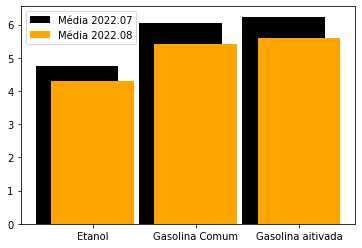

In [ ]:
import matplotlib.pyplot as plt


rotulos = ['Etanol','Gasolina Comum','Gasolina aitivada']
ind = np.arange(len(rotulos))
width = 0.6

bar_2207 = plt.bar(ind, list(tabelaJulho['Valor de Venda'].groupby(tabelaJulho['Produto']).mean()), color='black', label='Média 2022.07')
bar_2208 = plt.bar(ind+width/4,list(tabelaAgosto['Valor de Venda'].groupby(tabelaAgosto['Produto']).mean()), color='orange', label='Média 2022.08')

location = ind+width/4
rotulos=rotulos
plt.xticks(location, rotulos)
plt.legend();

Explicaçã breve do que houve com as médias dos preços 

#<font color = orange>2- Qual o preço médio da gasolina e do etanol nesses dois meses?

##<font color = orange> Mês de Julho

In [ ]:
tabelaJulho[['Valor de Venda']].groupby([tabelaJulho['Produto']]).mean()

,Valor de Venda
Produto,
ETANOL,4.759239
GASOLINA,6.059047
GASOLINA ADITIVADA,6.238814


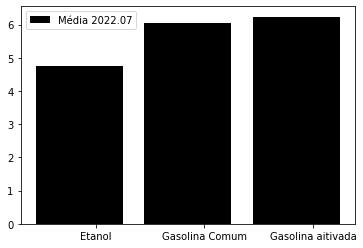

In [ ]:
import matplotlib.pyplot as plt
rotulos = ['Etanol','Gasolina Comum','Gasolina aitivada']
ind = np.arange(len(rotulos))
width = 0.6

bar_2207 = plt.bar(ind, list(tabelaJulho['Valor de Venda'].groupby(tabelaJulho['Produto']).mean()), color='black', label='Média 2022.07')

location = ind+width/4
rotulos=rotulos
plt.xticks(location, rotulos)
plt.legend();

##<font color = orange>Mês de Agosto

In [ ]:
tabelaAgosto[['Valor de Venda']].groupby(tabelaAgosto['Produto']).mean()

,Valor de Venda
Produto,
ETANOL,4.296892
GASOLINA,5.423378
GASOLINA ADITIVADA,5.596107


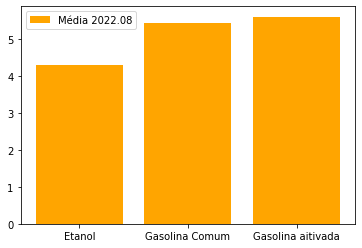

In [ ]:

rotulos = ['Etanol','Gasolina Comum','Gasolina aitivada']
ind = np.arange(len(rotulos))
width = 0.6

bar_2208 = plt.bar(ind+width/4,list(tabelaAgosto['Valor de Venda'].groupby(tabelaAgosto['Produto']).mean()), color='orange', label='Média 2022.08')

location = ind+width/4
rotulos=rotulos
plt.xticks(location, rotulos)
plt.legend();

#<font color = orange> 3- Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?

#<font color = orange> 4- Qual o preço médio da gasolina e do etanol por estado?

In [ ]:
#Realizando os calculos da média dos produtos por estado no mês de julho
dfjulho = tabelaJulho[['Valor de Venda']].groupby([tabelaJulho['Produto'], tabelaJulho['Estado - Sigla']]).mean()
dfjulho

In [ ]:
#Alterando o nome das colunas
dfjulho.rename(columns={'Valor de Venda':'Média do Valor'},inplace=True)
dfjulho

In [ ]:
#Realizando os calculos da média dos produtos por estado no mês de agosto
dfagosto = tabelaAgosto[['Valor de Venda']].groupby([tabelaAgosto['Produto'], tabelaAgosto['Estado - Sigla']]).mean()

In [ ]:
#Alterando o nome das colunas
dfagosto.rename(columns={'Valor de Venda':'Média do Valor'},inplace=True)
dfagosto

Média do Valor
Produto            Estado - Sigla                
ETANOL             AC                    5.128641
                   AL                    5.030152
                   AM                    4.763493
                   AP                    5.655000
                   BA                    4.770243
...                                           ...
GASOLINA ADITIVADA RS                    5.468107
                   SC                    5.558880
                   SE                    5.261623
                   SP                    5.523399
                   TO                    5.889279

[81 rows x 1 columns]

#<font color = orange> 5. Qual o município que possui o menor preço para a gasolina e para o etanol?

In [150]:
minimaPorMunicipio = tabelaJulho.groupby(['Produto','Municipio'])[['Valor de Venda']].min()




minEtanol = minimaPorMunicipio.loc['ETANOL'].sort_values(by='Valor de Venda',ascending = True).head(1)
minEtanol['Produto'] = 'ETANOL'
minGasolina = minimaPorMunicipio.loc['GASOLINA'].sort_values(by='Valor de Venda',ascending = True).head(1)
minGasolina['Produto'] = 'GASOLINA'
minAditivada = minimaPorMunicipio.loc['GASOLINA ADITIVADA'].sort_values(by='Valor de Venda',ascending = True).head(1)
minAditivada['Produto'] = 'GASOLINA ADITIVADA'

concatMins = pd.concat([minEtanol,minGasolina,minAditivada])
concatMins


,Valor de Venda,Produto
Municipio,,
PASSOS,3.39,ETANOL
MOGI MIRIM,4.92,GASOLINA
GARCA,4.99,GASOLINA ADITIVADA


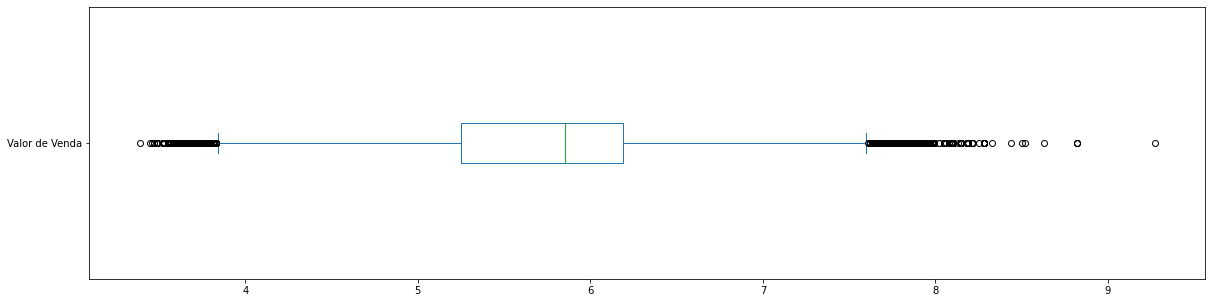

In [ ]:
tabelaJulho['Valor de Venda'].plot.box(vert= False, figsize=(20,5));